Backpropagation
==============

ANN by Keras
----------

Epoch 1/5
60000/60000 [==============================] - 8s 131us/step - loss: 0.5038 - acc: 0.8233
Epoch 2/5
60000/60000 [==============================] - 8s 126us/step - loss: 0.3785 - acc: 0.8637
Epoch 3/5
60000/60000 [==============================] - 8s 126us/step - loss: 0.3380 - acc: 0.8776
Epoch 4/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.3147 - acc: 0.8851
Epoch 5/5
10000/10000 [==============================] - 1s 80us/step

- TEST accuracy : 0.8753

- train image shape : 
 (60000, 28, 28)

- train labels length : 
 60000

- train labels : 
 [9 0 0 ... 3 0 5]

- test image shape : 
 (10000, 28, 28)

- test labels length : 
 10000



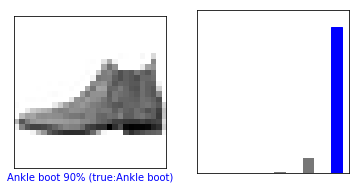

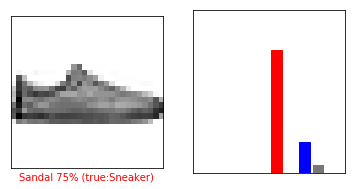

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

def main():
    
    # 1. load data
    fashion_mnist = keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    
    # normalize
    train_images = train_images / 255.0
    test_images = test_images / 255.0

    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


    # 2. create layer model
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    # 3. compile model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # 4. train model 
    model.fit(train_images, train_labels, epochs=5)


    # 5. calculate loss and accuaracy of the result
    test_loss, test_acc = model.evaluate(test_images, test_labels)

    print('\n- TEST accuracy :', test_acc)


    # 6. predict image
    predictions = model.predict(test_images)

    # print results
    print("\n- train image shape : \n",train_images.shape)
    print("\n- train labels length : \n", train_labels.shape[0])
    print("\n- train labels : \n", train_labels)
    print("\n- test image shape : \n", test_images.shape)
    print("\n- test labels length : \n", test_labels.shape[0])
    print()
    
    # print images
    i = 0
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions, test_labels, test_images, class_names)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions,  test_labels)
    plt.savefig('pictures/ANN1.png')

    i = 12
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions, test_labels, test_images, class_names)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions,  test_labels)
    plt.savefig('pictures/ANN2.png')


def plot_image(i, predictions_array, true_label, img, class_names):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% (true:{})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


if __name__ == "__main__":
    main()

Creating Model
------------

In [2]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

def main():
    
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

    num_classes = 10
    
    
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    
    # image shape : 28*28 = data features
    num_features = 784

    # 1st layer num of neurons
    hidden_layer_1 = 64
    
    # 2nd layer num of neurons
    hidden_layer_2 = 128

    # Training parameters
    learning_rate = 0.05
    training_steps = 3000
    batch_size = 512
    interval = 300


    # Training data를 float32 자료형으로 형변환 해줍니다.
    x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
    
    # 2차원 이미지를 1차원으로 변형합니다.
    x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
    
    # 값을 [0, 255] 에서 [0, 1]으로 정규화 해줍니다.
    x_train, x_test = x_train / 255., x_test / 255.

    # training data를 무작위로 선정하고, batch_size만큼 나눠주면서 초기화를 진행합니다.
    train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    train_data = train_data.repeat().shuffle(10000).batch(batch_size).prefetch(1)


    # weight 값들을 무작위로 초기화합니다.
    random_normal = tf.initializers.RandomNormal()

    # 각 layer에 들어갈 Weight, bias들을 할당해 줍니다.
    weights = {
        'h1': tf.Variable(random_normal([num_features, hidden_layer_1])),
        'h2': tf.Variable(random_normal([hidden_layer_1, hidden_layer_2])),
        'out': tf.Variable(random_normal([hidden_layer_2, num_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.zeros([hidden_layer_1])),
        'b2': tf.Variable(tf.zeros([hidden_layer_2])),
        'out': tf.Variable(tf.zeros([num_classes]))
    }


    # Training을 실제로 구현하는 부분입니다.
    for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
        # W 와 b 파라메터를 갱신하기 위해 함수를 호출합니다.
        params_optimization(batch_x, batch_y, weights, biases, num_classes, learning_rate)

        if step % interval == 0:
            '''
            neural_net() 함수는 model 생성에 사용되는 함수입니다.
            neural_net() 함수를 채워 pred를 완성해보도록 하겠습니다.
            '''
            pred = neural_net(batch_x, weights, biases)
            
            loss = cross_entropy(pred, batch_y, num_classes)
            acc = accuracy(pred, batch_y)
            print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))


    # Test를 진행하여 실제 정확도를 확인합니다.
    pred = neural_net(x_test, weights, biases)
    print("Test Accuracy: %f" % accuracy(pred, y_test))
    
    
    # 결과를 시각화합니다.
    plot_neural_network_results(pred, x_test, y_test, class_names)


    
# 인공 신경망 함수입니다.
'''
def neural_net(x, weights, biases) 함수를 채워보세요.
'''
def neural_net(x, weights, biases):
    
    # 총 2개의 layer로 이뤄져 있으며, fully connected 연산 후 sigmoid 함수에 적용하여 값을 비선형으로 만들어줍니다.
    
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1']) 
    layer_1 = tf.nn.sigmoid(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    out_layer = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])
    
    return tf.nn.softmax(out_layer)


# Cross-Entropy loss function에 대한 함수입니다.
def cross_entropy(y_pred, y_true, num_classes):

    y_true = tf.one_hot(y_true, depth=num_classes)
    
    # 값 중에 min 값이 1e-8, max 값이 1.0 이 넘어가는 값이 없도록 바운더리를 지정합니다.
    y_pred = tf.clip_by_value(y_pred, 1e-8, 1.)
    
    # cross-entropy를 수식으로 입력해 보세요.
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))


# 정확도(accuracy) 를 측정하는 함수입니다.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)


# 파라메터들을 갱신하는 함수입니다. 
def params_optimization(x, y, weights, biases, num_classes, learning_rate):
    # GradientTape() 함수를 묶어서 gradient를 자동 계산하도록 돕습니다.
    with tf.GradientTape() as gt:
        pred = neural_net(x, weights, biases)
        loss = cross_entropy(pred, y, num_classes)
        
    # variable을 업데이트합니다.
    variables_to_update = list(weights.values()) + list(biases.values())

    # gradient를 계산합니다.
    gradients = gt.gradient(loss, variables_to_update)
    
    # 파라메터(weight)들을 갱신하기 위한 함수를 지정해줍니다.
    optimizer = tf.optimizers.Adagrad(learning_rate)
    
    # optimizer로 W와 b를 갱신합니다.
    optimizer.apply_gradients(zip(gradients, variables_to_update))
    

def plot_neural_network_results(pred, x_test, y_test, class_names):
    # 결과를 시각화 하는 함수입니다.
    n_images = 10
    test_images = x_test[:n_images]
    predictions = pred

    plt.figure(figsize=(7,10))
    for i in range(n_images):
        plt.subplot(5,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(np.reshape(test_images[i], [28, 28]), cmap=plt.cm.binary)
        plt.xlabel("True : {} (Predict : {})".format(class_names[y_test[i]],
                                    class_names[np.argmax(predictions.numpy()[i])]))
    plt.savefig('pictures/ANN3.png')
    
    
if __name__ == "__main__":
    main()

'1.10.0'

Sigmoid Backpropagation
-------------

In [9]:
import numpy as np

def main():
    # Input 값을 다음과 같이 할당합니다.
    w_0 = 2; x_0 = -1; w_1 = -3; x_1 = -2; w_2 = -3

    # Forward propatation 은 차례로 모델의 값을 입력하는 방식입니다.
    # f(w, x) 를 다음과 같이 각 재정의를 통해서 선언합니다.
    h = -(w_0 * x_0 + w_1 * x_1 + w_2)
    g = 1 + np.exp(h)
    f = 1/g

    # 거꾸로 Back propagation을 진행해봅시다:
    # 첫번째 미분 대상은 f = 1 / g 입니다.
    dfdg = -1/(g**2)

    # 다음 미분 대상은 g = 1 + exp(h) 입니다.
    dgdh = np.exp(h)
    
    # 세번째 미분 대상은 h = -(w_0 * x_0 + w_1 * x_1 + w_2) 입니다.
    dhdw_0 = -x_0
    dhdx_0 = -w_0
    dhdw_1 = -x_1
    dhdx_1 = -w_1
    dhdw_2 = -1

    # Chain rule 을 적용하여 값을 구해보세요.
    dfdw_0 = dfdg * dgdh * dhdw_0
    dfdx_0 = dfdg * dgdh * dhdx_0
    dfdw_1 = dfdg * dgdh * dhdw_1
    dfdx_1 = dfdg * dgdh * dhdx_1
    dfdw_2 = dfdg * dgdh * dhdw_2
    
    return dfdw_0, dfdx_0, dfdw_1, dfdx_1, dfdw_2


if __name__ == "__main__":
    main()